<a href="https://colab.research.google.com/github/VEMULAVISHNUVARDHAN4076/Natural-Language-Processing/blob/main/2403A54076_NLP_Assignment_7_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**STEP 1 — Install & Import Libraries**

In [ ]:
# Install nltk (if not installed)
!pip install nltk

# Import libraries
import numpy as np
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt

from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

**STEP 2 — Create Dataset (24 Documents)**

In [ ]:
documents = [
    # Sports (6)
    "The football team won the championship match",
    "A great goal was scored in the final game",
    "The cricket tournament attracted many fans",
    "The player trained hard for the competition",
    "Basketball is a popular sport worldwide",
    "The coach developed a new training strategy",

    # Politics (6)
    "The government passed a new education policy",
    "The election results were announced yesterday",
    "Parliament debated the economic reform bill",
    "The president addressed the nation",
    "Political parties campaigned for votes",
    "The minister introduced a healthcare scheme",

    # Health (6)
    "The doctor prescribed medicine for the patient",
    "Regular exercise improves physical health",
    "The hospital provides advanced medical treatment",
    "A balanced diet prevents disease",
    "Vaccination protects against infection",
    "Mental health awareness is important",

    # Technology (6)
    "Artificial intelligence is transforming industries",
    "Machine learning improves data analysis",
    "Cybersecurity protects computer systems",
    "Software development requires programming skills",
    "The smartphone uses advanced technology",
    "Cloud computing stores data online"
]

df = pd.DataFrame(documents, columns=["Text"])
df.head()

,Text
0,The football team won the championship match
1,A great goal was scored in the final game
2,The cricket tournament attracted many fans
3,The player trained hard for the competition
4,Basketball is a popular sport worldwide


**STEP 3 — Preprocessing**

In [ ]:
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    # Lowercase
    text = text.lower()

    # Remove punctuation and numbers
    text = re.sub(r'[^a-z\s]', '', text)

    # Tokenize
    tokens = word_tokenize(text)

    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return " ".join(tokens)

df["Clean_Text"] = df["Text"].apply(preprocess)
df.head()

,Text,Clean_Text
0,The football team won the championship match,football team championship match
1,A great goal was scored in the final game,great goal scored final game
2,The cricket tournament attracted many fans,cricket tournament attracted many fan
3,The player trained hard for the competition,player trained hard competition
4,Basketball is a popular sport worldwide,basketball popular sport worldwide


**STEP 4 — TF-IDF Representation**

In [ ]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df["Clean_Text"])

print("TF-IDF Matrix Shape:", tfidf_matrix.shape)

TF-IDF Matrix Shape: (24, 98)


**STEP 5 — Cosine Similarity**

In [ ]:
cosine_sim = cosine_similarity(tfidf_matrix)

cosine_df = pd.DataFrame(cosine_sim)
cosine_df.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Print Some Sample Scores**

In [ ]:
print("Doc0 vs Doc1:", cosine_sim[0][1])
print("Doc0 vs Doc10:", cosine_sim[0][10])
print("Doc12 vs Doc14:", cosine_sim[12][14])
print("Doc18 vs Doc19:", cosine_sim[18][19])
print("Doc5 vs Doc23:", cosine_sim[5][23])

Doc0 vs Doc1: 0.0
Doc0 vs Doc10: 0.0
Doc12 vs Doc14: 0.0
Doc18 vs Doc19: 0.0
Doc5 vs Doc23: 0.0


**STEP 6 — Jaccard Similarity**

In [ ]:
def jaccard_similarity(text1, text2):
    set1 = set(text1.split())
    set2 = set(text2.split())
    intersection = set1.intersection(set2)
    union = set1.union(set2)
    return len(intersection) / len(union)

jaccard_matrix = np.zeros((len(df), len(df)))

for i in range(len(df)):
    for j in range(len(df)):
        jaccard_matrix[i][j] = jaccard_similarity(
            df["Clean_Text"][i], df["Clean_Text"][j]
        )

jaccard_df = pd.DataFrame(jaccard_matrix)
jaccard_df.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Print Sample Jaccard Scores**

In [ ]:
print("Doc0 vs Doc1:", jaccard_matrix[0][1])
print("Doc0 vs Doc10:", jaccard_matrix[0][10])
print("Doc12 vs Doc14:", jaccard_matrix[12][14])
print("Doc18 vs Doc19:", jaccard_matrix[18][19])
print("Doc5 vs Doc23:", jaccard_matrix[5][23])

Doc0 vs Doc1: 0.0
Doc0 vs Doc10: 0.0
Doc12 vs Doc14: 0.0
Doc18 vs Doc19: 0.0
Doc5 vs Doc23: 0.0


**STEP 7 — WordNet Semantic Similarity**

In [ ]:
def wordnet_similarity(word1, word2):
    synsets1 = wordnet.synsets(word1)
    synsets2 = wordnet.synsets(word2)

    if not synsets1 or not synsets2:
        return 0

    max_score = 0
    for s1 in synsets1:
        for s2 in synsets2:
            score = s1.wup_similarity(s2)
            if score and score > max_score:
                max_score = score
    return max_score

def sentence_similarity(sent1, sent2):
    words1 = sent1.split()
    words2 = sent2.split()

    scores = []
    for w1 in words1:
        max_word_score = 0
        for w2 in words2:
            score = wordnet_similarity(w1, w2)
            if score and score > max_word_score:
                max_word_score = score
        scores.append(max_word_score)

    return sum(scores)/len(scores) if len(scores)>0 else 0

**Apply to 10 Sentence Pairs**

In [ ]:
pairs = [(12,14),(0,1),(18,19),(0,10),(12,18),
         (7,9),(15,16),(20,21),(3,4),(22,23)]

for i,j in pairs:
    score = sentence_similarity(df["Clean_Text"][i], df["Clean_Text"][j])
    print(f"Doc {i} vs Doc {j} WordNet Similarity: {score:.3f}")

Doc 12 vs Doc 14 WordNet Similarity: 0.611
Doc 0 vs Doc 1 WordNet Similarity: 0.741
Doc 18 vs Doc 19 WordNet Similarity: 0.582
Doc 0 vs Doc 10 WordNet Similarity: 0.705
Doc 12 vs Doc 18 WordNet Similarity: 0.575
Doc 7 vs Doc 9 WordNet Similarity: 0.548
Doc 15 vs Doc 16 WordNet Similarity: 0.569
Doc 20 vs Doc 21 WordNet Similarity: 0.362
Doc 3 vs Doc 4 WordNet Similarity: 0.637
Doc 22 vs Doc 23 WordNet Similarity: 0.449


**STEP 8 — Visualization**

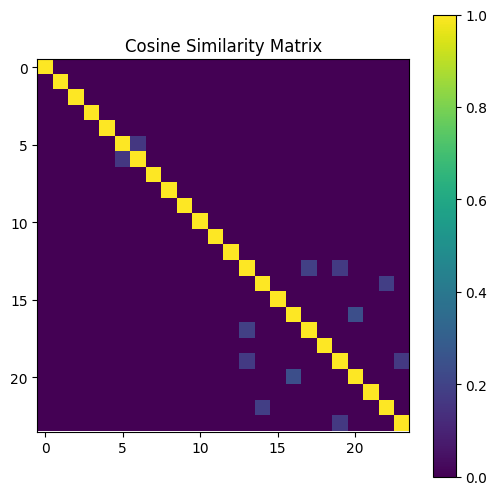

In [ ]:
plt.figure(figsize=(6,6))
plt.imshow(cosine_sim)
plt.title("Cosine Similarity Matrix")
plt.colorbar()
plt.show()